## Alexander's Test Script

In [266]:
import numpy as np

from model import *
import csv

# My Imports
import pandas as pd
from scipy.stats import pareto
import scipy

In [267]:
r_incomes = []
incomes = []
counts = []

with open('incomes.csv') as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader:
        r_incomes.append(row)
        incomes.append([int(row[0]) * 1000 / 12, int(row[1]) * 1000 / 12])
        counts.append(int(row[2]))

cum_counts = []
for i in range(len(counts)):
    cum_counts.append(sum(counts[:i + 1]))

hhld_count = sum(counts)

cum_ratios = [x / hhld_count for x in cum_counts]


# Plotting CSV Data

<AxesSubplot:title={'center':'Income Distribution'}>

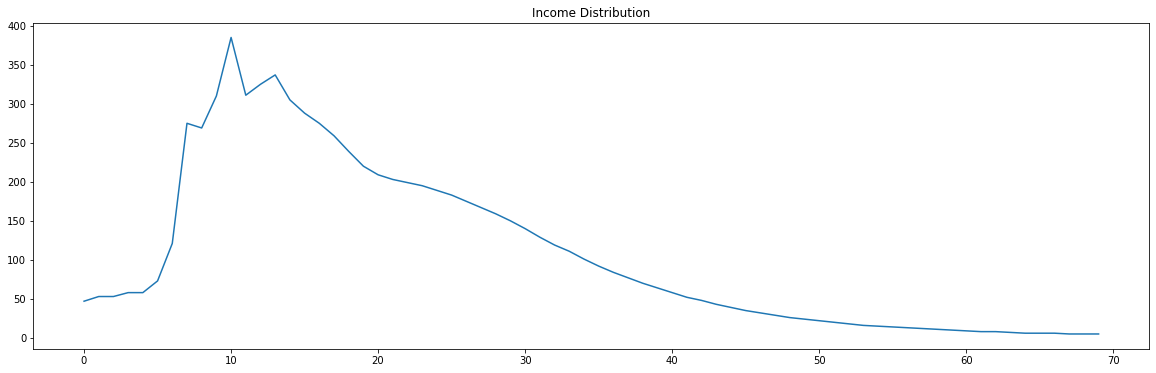

In [268]:
ri = pd.DataFrame(r_incomes, columns=['LI', 'HI', 'N']).astype(int)
ri.N.plot(figsize=(20,6), title='Income Distribution')

,Income_M
count,7679.000000
mean,3484.969831
std,2028.657188
min,83.333333
25%,1916.666667
50%,3083.333333
75%,4583.333333
max,11583.333333


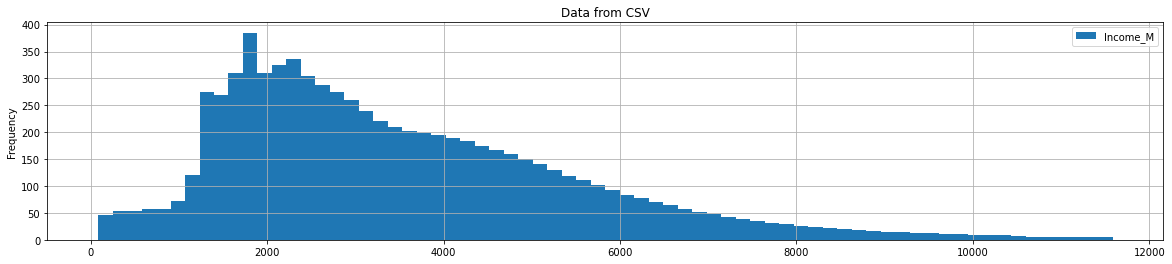

In [269]:
""" Convert to individual Data """
r_incomes = np.array(r_incomes, dtype=int)
data = []
for row in r_incomes:
    for _ in range(row[2]):
        data.append( np.mean([row[1], row[0]]) * 1000 /12 )


""" Analysing Income Data """
data_df = pd.DataFrame(data, columns=['Income_M'])
data_df.plot.hist(bins=70, figsize=(20,4), title="Data from CSV", grid=True)
data_df.describe()

# Chi-Squared Distribution Approach

,Constructed,CSV
count,10000.000000,7679.000000
mean,3474.037661,3484.969831
std,1904.386887,2028.657188
min,91.296470,83.333333
25%,2072.968868,1916.666667
50%,3142.515170,3083.333333
75%,4488.425974,4583.333333
max,14746.421452,11583.333333


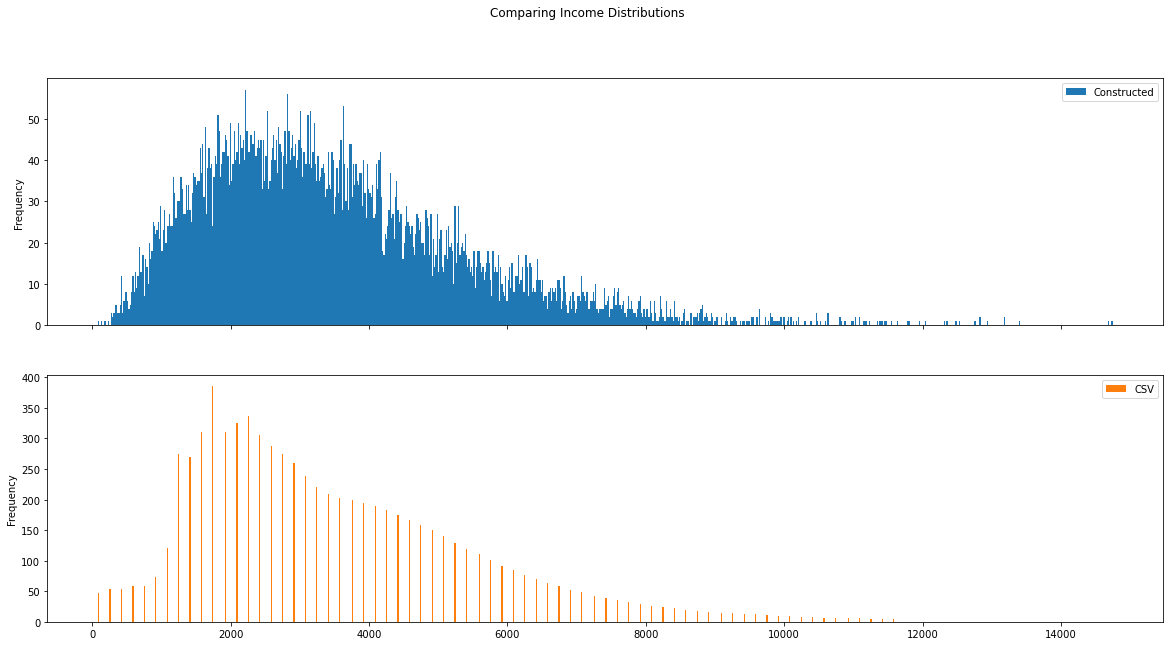

In [270]:
combined_df = pd.DataFrame()

parameter   = 6.5
size        = 10_000
cd = scipy.random.chisquare(parameter, size=size)

""" Scale for Std """
cd = cd / (2*parameter)**1/2

""" Adjust Mean so ~= 2600 """
mean_chi = parameter / (2*parameter)**1/2
cd = cd * (3484 / mean_chi)
combined_df['Constructed'] = np.sort(cd)
combined_df['CSV'] = data_df.Income_M

""" Plot Both Distributions """
combined_df.plot.hist(bins=800, figsize=(20,10), title="Comparing Income Distributions", subplots=True)

""" Describe Combined """
combined_df.describe()

** Not important
## Pareto Distribution of the Income Inequality

Pareto's distribution is used when modeling the income for different percentiles of a population. As percentiles increase, the Income grows exponentially following approximately the Pareto's distribution.
#### Pareto PDF:

$ f(x, b) = \frac{b}{x^{b+1}}$ , $x \geq 1,  b > 1 $

In this case x = 1, by fitting to the data and getting alpha, we can describe the degree of the income inequality

,CSV,Constructed
Percentile,,
0,83.333333,91.296470
1,250.000000,589.905717
2,583.333333,734.006129
3,750.000000,859.769335
4,916.666667,942.047023
...,...,...
96,7750.000000,7413.350967
97,8250.000000,7758.026656
98,8916.666667,8277.627686


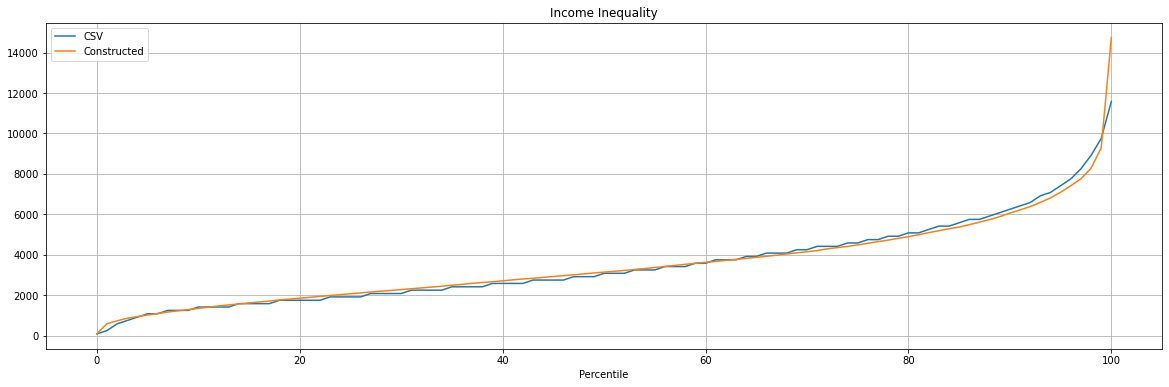

In [271]:
data_p = []
cd_p  = []
df_index = []
for percentile in range (101):
    df_index.append(percentile)
    data_p.append(combined_df.CSV.quantile(percentile/100))
    cd_p.append(combined_df.Constructed.quantile(percentile/100))

percentile_df = pd.DataFrame()
percentile_df['Percentile'] = df_index
percentile_df['CSV'] = data_p
percentile_df['Constructed'] = cd_p
percentile_df.set_index('Percentile', inplace=True)
percentile_df.plot(figsize=(20,6), title="Income Inequality", grid=True)
percentile_df

# Model Age Income Distribution
Income Data from the source is used a reference to calculate the income age distribution, relative to the mean income

TODO: Add Dutch Equivalent
data source : https://dqydj.com/average-median-top-income-by-age-percentiles/

In [272]:
Age_Average_Income = {
16	:5821.30,
17	:6760.37,
18	:9725.23,
19	:15062.78,
20	:18513.14,
21	:20712.18,
22	:24447.43,
23	:29814.28,
24	:33164.56,
25	:41461.27,
26	:43945.65,
27	:48376.91,
28	:47399.65,
29	:51638.49,
30	:52706.53,
31	:59068.01,
32	:58708.88,
33	:59082.00,
34	:60506.92,
35	:66320.38,
36	:68082.22,
37	:69128.48,
38	:66746.23,
39	:70235.80,
40	:72731.18,
41	:77143.30,
42	:71286.43,
43	:83279.50,
44	:74478.19,
45	:79101.10,
46	:75233.96,
47	:78354.08,
48	:68728.45,
49	:75458.16,
50	:81711.22,
51	:75777.31,
52	:80279.55,
53	:80802.58,
54	:77406.45,
55	:77308.78,
56	:76857.49,
57	:78139.14,
58	:73165.04,
59	:78624.85,
60	:73392.66,
61	:77592.46,
62	:77624.55,
63	:77189.64,
64	:73604.15,
65	:74420.36,
66	:79289.75,
67	:93445.14,
68	:84150.09,
69	:82464.49,
70	:76164.60,
71	:76744.71,
72	:98444.27,
73	:92254.10,
74	:70337.44,
75	:70820.15
}

,Original,Coefficient,Dutch
Age,,,
16,485.108333,0.090929,315.889353
17,563.364167,0.105597,366.847423
18,810.435833,0.151908,527.733773
19,1255.231667,0.235280,817.372722
20,1542.761667,0.289175,1004.604438
21,1726.015000,0.323524,1123.934025
22,2037.285833,0.381868,1326.625126
23,2484.523333,0.465698,1617.854022
24,2763.713333,0.518030,1799.654957


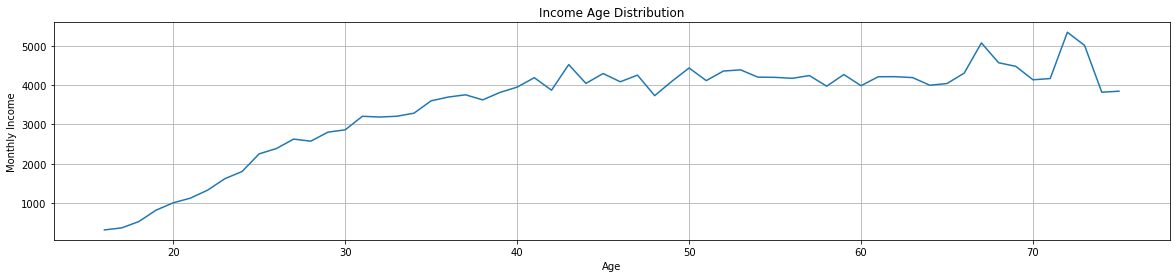

In [273]:
aid = pd.DataFrame.from_dict(Age_Average_Income, orient='index', columns=['Original'])
aid.index.rename('Age', inplace=True)

""" Adjust for Monthly Income """
aid.Original = aid.Original / 12

""" Adjust Relative to the Mean """
aid['Coefficient'] = aid.Original / aid.Original.mean()
aid['Dutch'] = aid.Coefficient * combined_df.Constructed.mean()
aid.Dutch.plot(figsize=(20,4), title="Income Age Distribution", ylabel='Monthly Income', grid=True)

""" Numpy array of Age Coefficient """
age_coef = aid.Coefficient.to_numpy()
aid

# Generate 3D data
incomes format      = (lower_bound, upper_bound)
cum_ratios format   = (age, cum_ratios)

In [274]:
data = []
with open('incomes.csv') as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader:
        data.append([int(row[0]) * 1000 / 12, int(row[1]) * 1000 / 12, int(row[2])])
data = np.array(data).astype(float)
data[:,2] = np.cumsum(data[:,2]/data[:,2].sum())
bins = (data[:, 1]).flatten()
bins = np.insert(bins, 0, 0)
bins

array([    0.        ,   166.66666667,   333.33333333,   500.        ,
         666.66666667,   833.33333333,  1000.        ,  1166.66666667,
        1333.33333333,  1500.        ,  1666.66666667,  1833.33333333,
        2000.        ,  2166.66666667,  2333.33333333,  2500.        ,
        2666.66666667,  2833.33333333,  3000.        ,  3166.66666667,
        3333.33333333,  3500.        ,  3666.66666667,  3833.33333333,
        4000.        ,  4166.66666667,  4333.33333333,  4500.        ,
        4666.66666667,  4833.33333333,  5000.        ,  5166.66666667,
        5333.33333333,  5500.        ,  5666.66666667,  5833.33333333,
        6000.        ,  6166.66666667,  6333.33333333,  6500.        ,
        6666.66666667,  6833.33333333,  7000.        ,  7166.66666667,
        7333.33333333,  7500.        ,  7666.66666667,  7833.33333333,
        8000.        ,  8166.66666667,  8333.33333333,  8500.        ,
        8666.66666667,  8833.33333333,  9000.        ,  9166.66666667,
      

In [275]:
data_3d = []
for c in age_coef:
    data_3d.append(c * np.sort(cd))
data_3d = np.array(data_3d).T
pd.DataFrame(data_3d)
data_3d

array([[8.30145943e+00, 9.64061932e+00, 1.38686552e+01, ...,
        1.31558873e+02, 1.00304641e+02, 1.00993009e+02],
       [1.17013859e+01, 1.35890090e+01, 1.95486693e+01, ...,
        1.85439820e+02, 1.41385176e+02, 1.42355471e+02],
       [1.72203524e+01, 1.99982743e+01, 2.87688125e+01, ...,
        2.72902636e+02, 2.08069590e+02, 2.09497525e+02],
       ...,
       [1.21812930e+03, 1.41463329e+03, 2.03504159e+03, ...,
        1.93045235e+04, 1.47183785e+04, 1.48193874e+04],
       [1.33437170e+03, 1.54962747e+03, 2.22923946e+03, ...,
        2.11466957e+04, 1.61229088e+04, 1.62335567e+04],
       [1.34087134e+03, 1.55717561e+03, 2.24009795e+03, ...,
        2.12497000e+04, 1.62014425e+04, 1.63126294e+04]])

In [276]:
density, bounds = np.histogram(data_3d, bins=bins, density=False)
bounds = bounds.astype(int)
ul_income_bounds = []
for i, b in enumerate(bounds):
    if i == 0 : pass
    elif i == 1 : ul_income_bounds.append([0, b])
    else: ul_income_bounds.append([bounds[i-1], b])
ul_income_bounds

[[0, 166],
 [166, 333],
 [333, 500],
 [500, 666],
 [666, 833],
 [833, 1000],
 [1000, 1166],
 [1166, 1333],
 [1333, 1500],
 [1500, 1666],
 [1666, 1833],
 [1833, 2000],
 [2000, 2166],
 [2166, 2333],
 [2333, 2500],
 [2500, 2666],
 [2666, 2833],
 [2833, 3000],
 [3000, 3166],
 [3166, 3333],
 [3333, 3500],
 [3500, 3666],
 [3666, 3833],
 [3833, 4000],
 [4000, 4166],
 [4166, 4333],
 [4333, 4500],
 [4500, 4666],
 [4666, 4833],
 [4833, 5000],
 [5000, 5166],
 [5166, 5333],
 [5333, 5500],
 [5500, 5666],
 [5666, 5833],
 [5833, 6000],
 [6000, 6166],
 [6166, 6333],
 [6333, 6500],
 [6500, 6666],
 [6666, 6833],
 [6833, 7000],
 [7000, 7166],
 [7166, 7333],
 [7333, 7500],
 [7500, 7666],
 [7666, 7833],
 [7833, 8000],
 [8000, 8166],
 [8166, 8333],
 [8333, 8500],
 [8500, 8666],
 [8666, 8833],
 [8833, 9000],
 [9000, 9166],
 [9166, 9333],
 [9333, 9500],
 [9500, 9666],
 [9666, 9833],
 [9833, 10000],
 [10000, 10166],
 [10166, 10333],
 [10333, 10500],
 [10500, 10666],
 [10666, 10833],
 [10833, 11000],
 [11000, 1

In [277]:
new_cum_ratios = []
dd = []  # Number of people that make that much money
for age in range(data_3d.shape[1]):
    density, bounds = np.histogram(data_3d[:, age], bins=bins, density=False)
    new_cum_ratios.append(np.cumsum(density) / np.cumsum(density)[-1])
    dd.append(density)

density
# pd.DataFrame(np.array(new_cum_ratios).T)

array([  2,   6,  40,  58, 107, 140, 195, 215, 245, 262, 313, 308, 352,
       344, 367, 365, 330, 353, 349, 360, 349, 324, 296, 298, 311, 292,
       271, 258, 210, 211, 192, 188, 166, 154, 153, 164, 115, 125, 109,
        76,  96,  93,  96,  62,  68,  51,  55,  51,  43,  43,  53,  34,
        32,  30,  20,  25,  13,  11,  23,  13,   7,   9,   5,  10,   4,
        11,  10,   5,   2,   6])

In [278]:
data_3d

array([[8.30145943e+00, 9.64061932e+00, 1.38686552e+01, ...,
        1.31558873e+02, 1.00304641e+02, 1.00993009e+02],
       [1.17013859e+01, 1.35890090e+01, 1.95486693e+01, ...,
        1.85439820e+02, 1.41385176e+02, 1.42355471e+02],
       [1.72203524e+01, 1.99982743e+01, 2.87688125e+01, ...,
        2.72902636e+02, 2.08069590e+02, 2.09497525e+02],
       ...,
       [1.21812930e+03, 1.41463329e+03, 2.03504159e+03, ...,
        1.93045235e+04, 1.47183785e+04, 1.48193874e+04],
       [1.33437170e+03, 1.54962747e+03, 2.22923946e+03, ...,
        2.11466957e+04, 1.61229088e+04, 1.62335567e+04],
       [1.34087134e+03, 1.55717561e+03, 2.24009795e+03, ...,
        2.12497000e+04, 1.62014425e+04, 1.63126294e+04]])

In [279]:
df3d = pd.DataFrame(np.array(new_cum_ratios).T, columns=aid.index.values).set_index(bins[1:].astype(int))
df3d_ri = pd.DataFrame(np.array(dd).T, columns=aid.index.values).set_index(bins[1:].astype(int))
for age in range(76, 101):
    df3d[age] = df3d[75]
df3d.drop(columns=[16,17], inplace=True)

<AxesSubplot:title={'center':'Cumulative Income Distribution per Age'}>

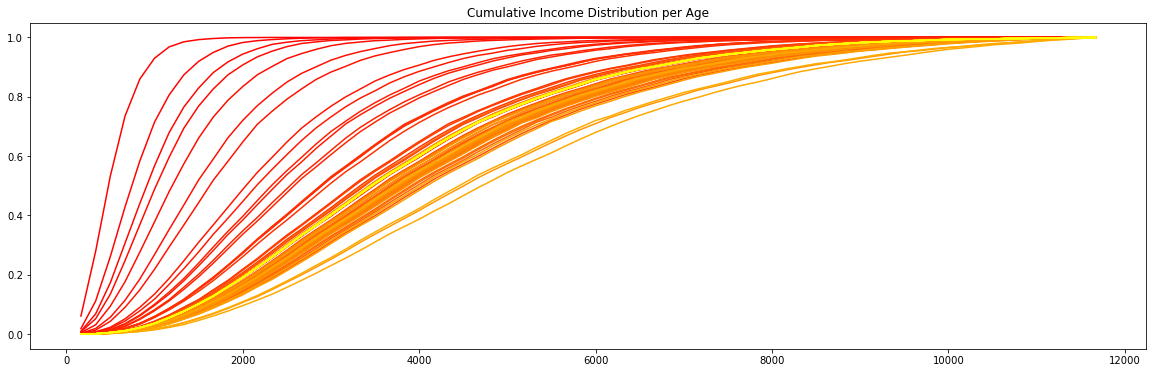

In [280]:
df3d.plot(figsize=(20,6), legend=False, colormap='autumn', title='Cumulative Income Distribution per Age')

<AxesSubplot:title={'center':'Income Distribution per Age'}>

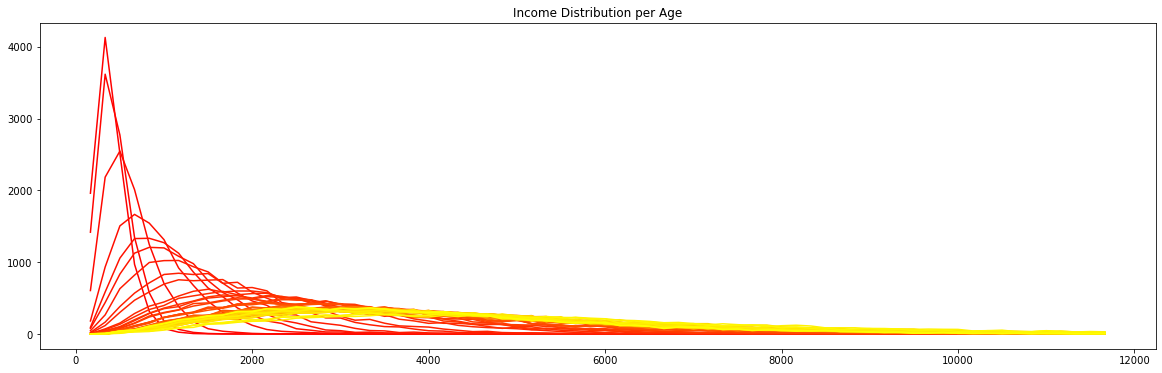

In [281]:
df3d_ri.plot(figsize=(20,6), legend=False, colormap='autumn', title='Income Distribution per Age')

# To Use in the model

In [282]:
"""
incomes     : remains as it is
cum_rations : with one additional dimension (age), shape = (69, 60) (69 bins, 60 ages [16, 75)
"""
incomes = np.array(incomes)
new_cum_ratios = df3d.to_numpy()

In [283]:
np.save('new_incomes', incomes)
np.save('new_cum_ratios', new_cum_ratios)

"""
Use:
new_incomes    = np.load('new_incomes)
new_cum_ratios = np.load('new_cum_ratios')
"""

"\nUse:\nnew_incomes    = np.load('new_incomes)\nnew_cum_ratios = np.load('new_cum_ratios')\n"

------------------------------------------------------------------------------------------------------------------------------
## Run Model with given Incomes & Cumulative Ratios

In [284]:
model = HousingMarket(rental_cost=2000, incomes=incomes, income_distr=cum_ratios)
model.run_model(20000)
data = model.datacollector
data

In [285]:
mv = data.get_model_vars_dataframe()    # mv : 'model variables'

------------------------------------------------------------------------------------------------------------------------------
## Plotting Model Parameters

Index(['Overall Savings', 'Gini', 'Mean Income'], dtype='object')

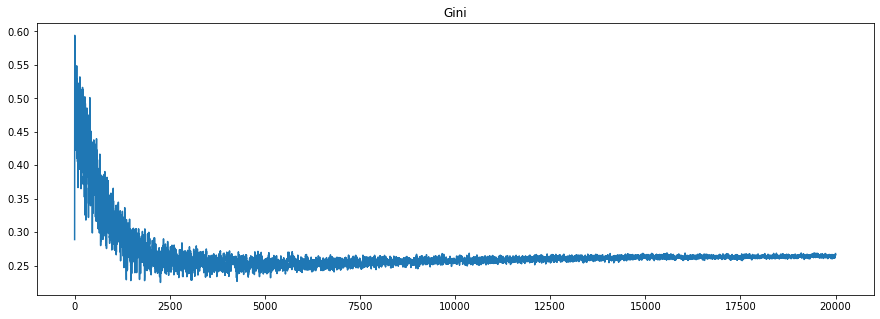

In [286]:
mv.Gini.plot(figsize=(15,5), title='Gini')
mv.columns

<AxesSubplot:title={'center':'Overall Savings'}>

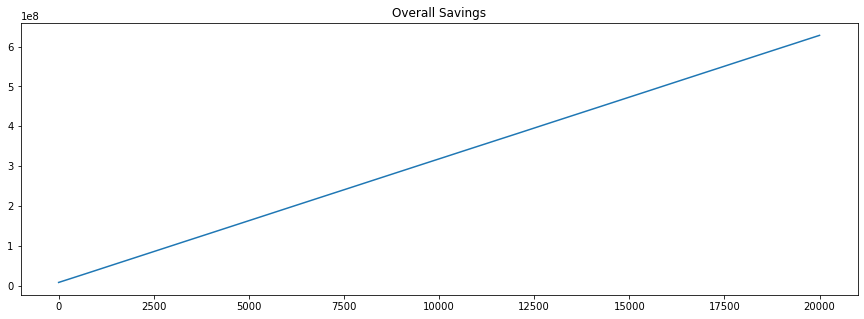

In [287]:
mv['Overall Savings'].plot(figsize=(15,5), title='Overall Savings')

<AxesSubplot:title={'center':'Mean Income'}>

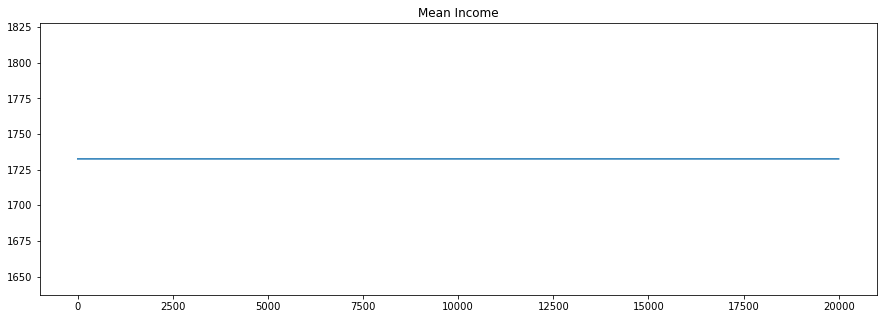

In [288]:
mv['Mean Income'].plot(figsize=(15, 5), title='Mean Income')